# Sales Channel Prediction Case Study :Project6 

Problem Statement:
Build a model which predicts sales based on the money spent on different platforms for marketing    


Dataset Description:The adverstising dataset captures sales revenue generated with respect to advertisement 
spends across multiple channels like radio, tv and newspaper.

TV - Spend on TV Advertisements

Radio - Spend on radio Advertisements

Newspaper - Spend on newspaper Advertisements

Sales - Sales revenue generated(Our Target Variable)


In [1]:
#loading the required libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
#loading the dataset
df=pd.read_csv('advertising.csv')
df

,Serial No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.shape  

(200, 5)

There are 200 rows and 5 columns

In [16]:
#We can drop the serial number which is irrelevant column for prediction
df.drop(["Serial No."],axis=1,inplace=True)

In [17]:
df.head() #shows first five data 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.tail() #shows last 5 rows of the dataset 

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [19]:
df.dtypes #shows the data types of each variables

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Thus wee all the datatypes are float ,so we dont need to convert any variable.Only we will use scaler later. 

In [20]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no missing values in the dataset

<AxesSubplot:>

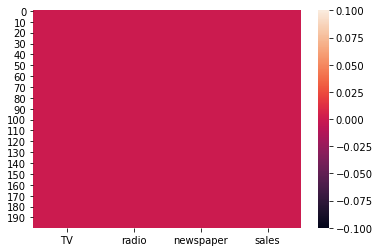

In [21]:
sns.heatmap(df.isnull()) #visual representation of no missing value present

univariate analysis using distplot to see whether they are normally distributed or skewness present

<AxesSubplot:xlabel='TV', ylabel='Density'>

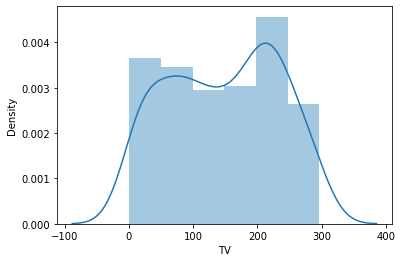

In [22]:
sns.distplot(df['TV']) #not normally distributed

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

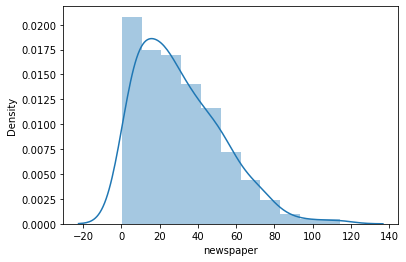

In [23]:
sns.distplot(df['newspaper']) #not normally distributed,right skewed

<AxesSubplot:xlabel='radio', ylabel='Density'>

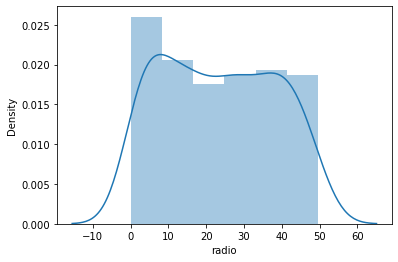

In [24]:
sns.distplot(df['radio']) #not normally distributed

<AxesSubplot:xlabel='sales', ylabel='Density'>

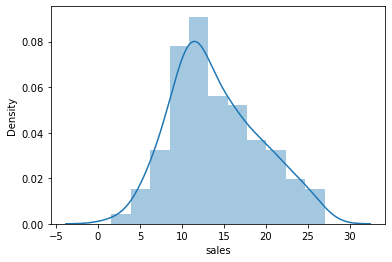

In [25]:
sns.distplot(df['sales']) #the data are normally distributed

In [26]:
df.columns #showing all the columns features names in the dataset

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

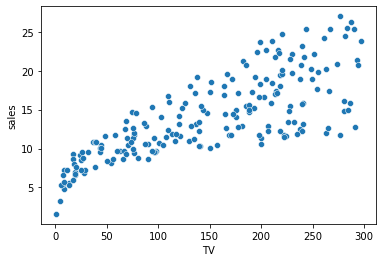

In [29]:
#Bivariate Analysis
sns.scatterplot(x="TV",y="sales",data=df); 
                                                        

The data's are linealy distributed that means if spend on TV rises,sale also rises

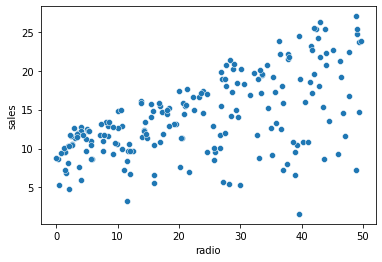

In [30]:
sns.scatterplot(x="radio",y="sales",data=df); 

slight linear distribution and getting stagnant

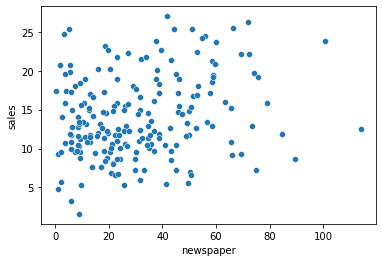

In [32]:
sns.scatterplot(x="newspaper",y="sales",data=df); 

#Not showing linear distribution

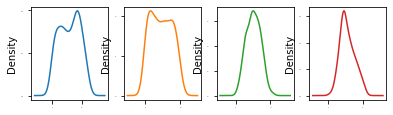

In [41]:
df.plot(kind="density",subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

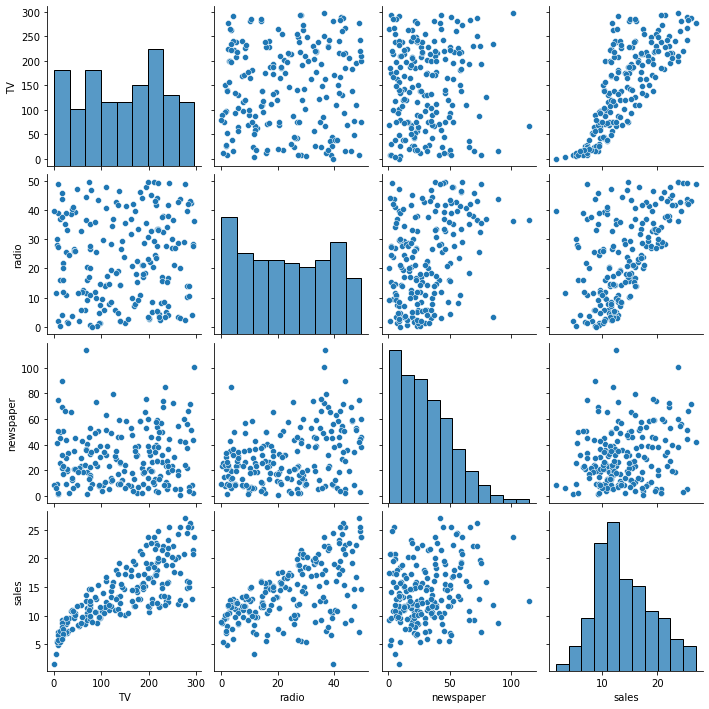

In [33]:
sns.pairplot(df) #shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

#some features shows collinearity between them ,linear relationship bw tv and sales

In [37]:
df.corr()["sales"].sort_values()

newspaper    0.204725
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

Sales is correlated strongly with TV(78%),then radio(57%) and last newspaper(20%).
That means people are spending on TV most then next on radio and last newspaper

<AxesSubplot:title={'center':'Correlation Matrix'}>

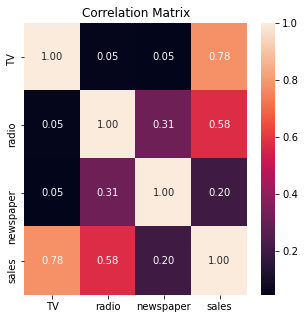

In [40]:
plt.figure(figsize=(5,5))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [34]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Observation:
    1.No missing value
    2.Mean of the features are greater than median means right skewed.
    3.There is strong variation in TV.   

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

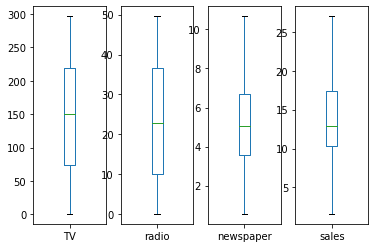

In [44]:
df.plot(kind ='box',subplots = True,sharex = False)

As per the boxplot,no outliers are present,we dont hv to remove any.

In [35]:
#checking skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [36]:
#removing the skewness of nespaper
import numpy as np
df['newspaper']=np.sqrt(df['newspaper'])
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

As considering range of skewness is  as -/+0.6 so we see skewness present in newspaper.we can remove it.

# Separating the Columns into features and Target

In [51]:
x_features=df.drop('sales',axis=1)
y_target=df["sales"]

# Scaling the data using StandardScaler

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler
x_features=ss().fit_transform(x_features)

In [53]:
x_features

array([[ 9.69852266e-01,  9.81522472e-01,  1.56309461e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.74855194e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.56604912e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.23357596e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.23036007e+00],
       [-1.61540845e+00,  1.73103399e+00,  1.73106889e+00],
       [-1.04557682e+00,  6.43904671e-01, -1.43678801e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.52652825e-01],
       [-1.61657614e+00, -1.42906863e+00, -2.03568892e+00],
       [ 6.16042873e-01, -1.39530685e+00, -2.63332869e-01],
       [-9.45155670e-01, -1.17923146e+00, -1.08436840e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.54396138e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.46436938e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.20797302e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.07641928e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.04903522e+00],
       [-9.25304978e-01,  9.00494200e-01

In [114]:
#Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_features,y_target,test_size=0.33,random_state=i)

In [115]:
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [116]:
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_features,y_target, test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random State",i,"The model performs well")
        print("At Random state:",i)
        print(f"At random state,the training accuracy:-", r2_score(y_train,pred_train)*100)
        print(f"At random state,the testing accuracy:-", r2_score(y_test,pred_test)*100)   
        print("\n")

At Random State 95 The model performs well
At Random state: 95
At random state,the training accuracy:- 89.3685200481859
At random state,the testing accuracy:- 89.42403670869861


At Random State 106 The model performs well
At Random state: 106
At random state,the training accuracy:- 89.61656084319158
At random state,the testing accuracy:- 89.55809736183326


At Random State 146 The model performs well
At Random state: 146
At random state,the training accuracy:- 89.66375187692289
At random state,the testing accuracy:- 89.69321184802698


At Random State 185 The model performs well
At Random state: 185
At random state,the training accuracy:- 89.61193648288003
At random state,the testing accuracy:- 89.62207515129441




In [117]:
x_train, x_test, y_train, y_test = train_test_split(x_features,y_target, test_size=0.2, random_state=185)

In [118]:
#training the model
lr.fit(x_train,y_train)

LinearRegression()

In [119]:
pred_test=lr.predict(x_test)

In [120]:
print(r2_score(y_test,pred_test))

0.8962207515129441


# cross_validation of the model

In [122]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,x_features,y_target,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold :",j)
    print("The CV score is :",cv_mean)
    print("The accuracy score for training :",Train_accuracy)
    print("The accuracy score for testing :",Test_accuracy)
    print("\n")
    


At cross fold : 2
The CV score is : 0.8916349860383767
The accuracy score for training : -0.8616384186310411
The accuracy score for testing : 0.8962207515129441


At cross fold : 3
The CV score is : 0.8915588165323286
The accuracy score for training : -0.8616384186310411
The accuracy score for testing : 0.8962207515129441


At cross fold : 4
The CV score is : 0.8903579284297554
The accuracy score for training : -0.8616384186310411
The accuracy score for testing : 0.8962207515129441


At cross fold : 5
The CV score is : 0.8873331295445761
The accuracy score for training : -0.8616384186310411
The accuracy score for testing : 0.8962207515129441


At cross fold : 6
The CV score is : 0.8900202280811486
The accuracy score for training : -0.8616384186310411
The accuracy score for testing : 0.8962207515129441


At cross fold : 7
The CV score is : 0.8861692012354758
The accuracy score for training : -0.8616384186310411
The accuracy score for testing : 0.8962207515129441


At cross fold : 8
The 

We see there is almost equal accuracy among cross validayion,traing and testing data,
so number of cv folds  dont have much impact on accuracy, so we can take cv=5 

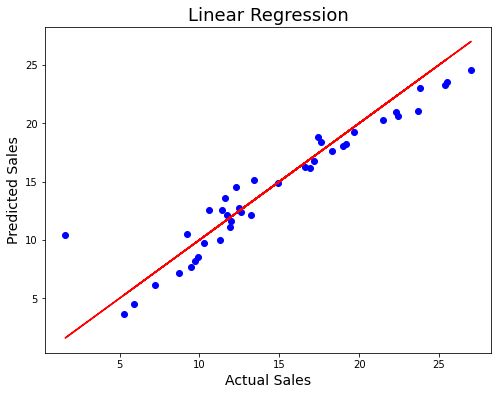

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Sales",fontsize=14)
plt.ylabel("Predicted Sales",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints ,we can improve more by regularization and hyperparameter technique.
There are some datapoint far away from best fit line,which can incresae the mse error so we need to regularise and improve the r2_score 

# REGULARIZATION

In [133]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters ={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [138]:
#final model training
ls=Lasso(alpha= 0.1, random_state= 0)
ls.fit(x_train,y_train)   
ls_score_training=ls.score(x_train,y_train) 
pred_ls=ls.predict(x_test) 
ls_score_training*100         

89.51424240275254

In [140]:
lss=r2_score(y_test,pred_ls)
lss*100

89.34117547164992

In [141]:
cv_score=cross_val_score(ls,x_features,y_target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

88.84792606387283

# Model 1:Random Forest Regressor

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto",'sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [146]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score',rfs*100)

rfscore=cross_val_score(rf,x_features,y_target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


R2 Score 97.57011359418229
Cross Val Score: 97.69188809002036


# Model2:Decision Tree Regressor

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters={'splitter':["best","random"],
           'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
            "max_depth" : [1,3,5,7,9,11,12],
            "max_features":["auto","log2","sqrt",None],
           }
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'random'}


In [155]:
dtr=DecisionTreeRegressor(max_depth= 11, max_features= 'auto',min_samples_leaf= 1, splitter= 'random')
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_decision=dtr.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score',dts*100)

dtscore=cross_val_score(dtr,x_features,y_target,cv=5)
dtc=rfscore.mean()
print('Cross Val Score:',dtc*100)

R2 Score 95.03592628785533
Cross Val Score: 97.69188809002036


# Model 3:AdaBoost Regressor

In [167]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

parameters={'n_estimators': [2,5,10,20],
           'learning_rate': [0.1,0.01,0.001,1],
           'random_state':[3],
           'loss':['linear','square','exponential']
           }

ada=AdaBoostRegressor()
clf=GridSearchCV(ada,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 20, 'random_state': 3}


In [168]:
ada=AdaBoostRegressor(learning_rate= 1, loss= 'exponential',n_estimators= 20, random_state= 3)
ada.fit(x_train,y_train)
ada.score(x_train,y_train)
pred_decision=ada.predict(x_test)

ads=r2_score(y_test,pred_decision)
print('R2 Score',ads*100)

adscore=cross_val_score(ada,x_features,y_target,cv=5)
adc=adscore.mean()
print('Cross Val Score:',adc*100)

R2 Score 94.43110844523744
Cross Val Score: 93.73492972198491


# Model 4:GradientBoosting Regressor

In [170]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={ 'loss':['squared_error','absolute_error','huber','quantile'],
              'learning_rate':[0.1,0.01,0.001,1],
              'n_estimators':[2,5,10,20],
               'criterion':['mae','mse'],      
            }

gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 20}


In [171]:
gbr=GradientBoostingRegressor(learning_rate= 0.1, loss= 'squared_error',n_estimators= 20, criterion= 'mse')
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_decision=gbr.predict(x_test)

gbs=r2_score(y_test,pred_decision)
print('R2 Score',gbs*100)

gbscore=cross_val_score(gbr,x_features,y_target,cv=5)
gbc=adscore.mean()
print('Cross Val Score:',gbc*100)

R2 Score 92.4004385216262
Cross Val Score: 93.73492972198491


Thus comparing all above model, we find that Random forest regressor the model accuracy  and 
cross validatiin  after hyperparametr tuning yield 97% which shows our model is performing extremely well. Thus this model is able to predict very well total sales generated from tv,newspaper and radio 

# Saving the model :Randon Forest Regressor :Best Model

In [147]:
import pickle
filename='sales.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [148]:
loaded_model=pickle.load(open('sales.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

97.57011359418229


In [149]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,18.362,25.021,18.82,21.644,10.153,11.519,9.673,24.346,12.728,24.832,...,5.427,12.74,12.394,8.67,5.855,15.164,15.909,7.274,6.699,11.953
Original,18.362,25.021,18.82,21.644,10.153,11.519,9.673,24.346,12.728,24.832,...,5.427,12.74,12.394,8.67,5.855,15.164,15.909,7.274,6.699,11.953
